# *BIN517 - Project*
# *Oğuzhan Aydın 2361111*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay

In [2]:
dataset = pd.read_csv('Data_Project.csv')

In [3]:
dataset

,ID,rash,skin lesions,headache,ulcerative lesions,oral and genital ulcers,fever,perianal papules,inguinal adenopathy,genital ulcer lesions,...,ulcers,loss of appetite,Vesicles,lymphadenopathy,myalgias,postules,encephalitis,symptoms compatible with monkeypox,blisters on limbs and genitals,Status
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,207,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
207,208,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
208,209,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
209,210,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
dataset.dtypes

ID                                      int64
rash                                    int64
skin lesions                            int64
headache                                int64
ulcerative lesions                      int64
oral and genital ulcers                 int64
fever                                   int64
perianal papules                        int64
inguinal adenopathy                     int64
genital ulcer lesions                   int64
pustules                                int64
cough                                   int64
blisters                                int64
erythema with vesicles and papules      int64
difficulty breathing                    int64
severe anemia                           int64
fatigue                                 int64
muscle pain                             int64
dysphagia                               int64
decreased physical strength             int64
outbreak on the skin                    int64
hands                             

In [4]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=44)

## XGBoost

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=935)
model = XGBClassifier(learning_rate=0.0991, gamma=0, n_estimators = 80)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
    
# plot_confusion_matrix(classifier, X_test, y_test)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('accuracy:   ', accuracy_score(y_test, y_pred)
         , 'f1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , 'precision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , 'recall:     ', recall_score(y_test, y_pred, average='weighted')
         , 'sensitivity:', sensitivity
         , 'specificity:', specificity, '\n\n')

accuracy:    1.0 f1-score:    1.0 precision:   1.0 recall:      1.0 sensitivity: 1.0 specificity: 1.0 




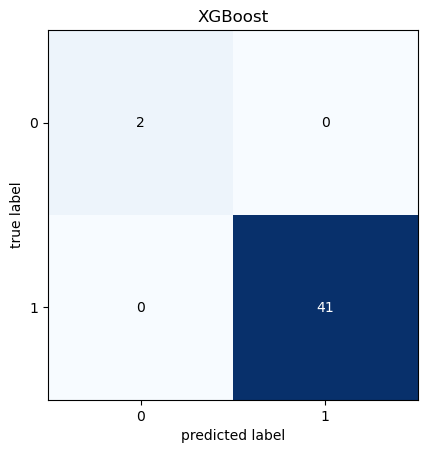

In [6]:
fig, ax = plot_confusion_matrix(cm)
ax.set_title('XGBoost')
plt.savefig('XGBoost_cm.svg', bbox_inches='tight')

## K-Fold (XGBoost)

In [7]:
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k, random_state=722, shuffle=True)
kf.get_n_splits(X)
i=1
accuracy_av = f1_score_av = precision_av = recall_av = sensitivity_av = specificity_av = 0


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = XGBClassifier(learning_rate=0.0991, gamma=0, n_estimators = 80, eta = 0.255)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    
    print('Fold ', i, ':\n        accuracy:   ', accuracy_score(y_test, y_pred)
         , '\n        f1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\n        precision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\n        recall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\n        sensitivity:', sensitivity
         , '\n        specificity:', specificity, '\n\n')
    
    accuracy_av+=accuracy_score(y_test, y_pred) / k
    f1_score_av+=f1_score(y_test, y_pred, average='weighted') / k
    precision_av+=precision_score(y_test, y_pred, average='weighted',  zero_division=0) / k
    recall_av+=recall_score(y_test, y_pred, average='weighted') / k
    sensitivity_av+=sensitivity / k
    specificity_av+=specificity / k
    
    i+=1

print('Averages:', '\n        accuracy average:   ', accuracy_av
    , '\n        f1-score average:   ', f1_score_av
    , '\n        precision average:  ', precision_av
    , '\n        recall average:     ', recall_av
    , '\n        specificity average:', specificity_av, '\n\n')
    

[[ 0  4]
 [ 0 39]]
Fold  1 :
        accuracy:    0.9069767441860465 
        f1-score:    0.862733976176971 
        precision:   0.8226068144943213 
        recall:      0.9069767441860465 
        sensitivity: 0.0 
        specificity: 1.0 


[[ 0  5]
 [ 0 37]]
Fold  2 :
        accuracy:    0.8809523809523809 
        f1-score:    0.8251959011452682 
        precision:   0.7760770975056689 
        recall:      0.8809523809523809 
        sensitivity: 0.0 
        specificity: 1.0 


[[ 1  3]
 [ 0 38]]
Fold  3 :
        accuracy:    0.9285714285714286 
        f1-score:    0.9084990958408681 
        precision:   0.9337979094076655 
        recall:      0.9285714285714286 
        sensitivity: 0.25 
        specificity: 1.0 


[[ 0  5]
 [ 0 37]]
Fold  4 :
        accuracy:    0.8809523809523809 
        f1-score:    0.8251959011452682 
        precision:   0.7760770975056689 
        recall:      0.8809523809523809 
        sensitivity: 0.0 
        specificity: 1.0 


[[ 0  7]
 [ 

## SVM

In [10]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=935)
classifier = SVC(kernel = 'poly', random_state = 935, degree=3, gamma='scale')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# plot_confusion_matrix(classifier, X_test, y_test)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nspecificity:', specificity, '\n\n')


accuracy:    0.9534883720930233 
f1-score:    0.9534883720930233 
precision:   0.9534883720930233 
recall:      0.9534883720930233 
specificity: 0.975609756097561 




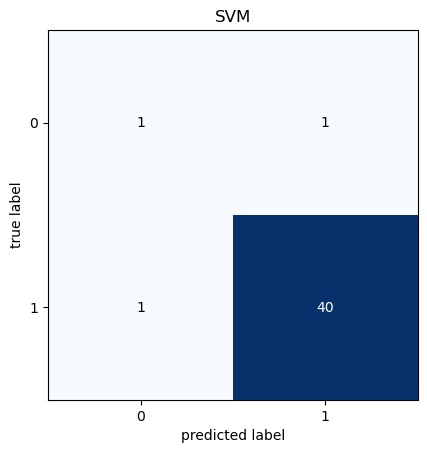

In [11]:
fig, ax = plot_confusion_matrix(cm)
ax.set_title('SVM')
plt.savefig('SVM_cm.svg', bbox_inches='tight')

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 120)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# plot_confusion_matrix(classifier, X_test, y_test)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')


accuracy:    0.9534883720930233 
f1-score:    0.9606589147286823 
precision:   0.9767441860465116 
recall:      0.9534883720930233 
sensitivity: 1.0 
specificity: 0.9512195121951219 




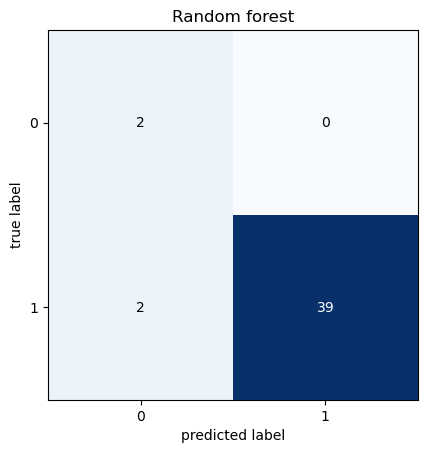

In [16]:
fig, ax = plot_confusion_matrix(cm)
ax.set_title('Random forest')
plt.savefig('RF_cm.svg', bbox_inches='tight')

## K-Fold (Random Forest)

In [17]:
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k, random_state=722, shuffle=True)
kf.get_n_splits(X)
i=1
accuracy_av = f1_score_av = precision_av = recall_av = sensitivity_av = specificity_av = 0


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 120)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    
    print('Fold ', i, ':\n        accuracy:   ', accuracy_score(y_test, y_pred)
         , '\n        f1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\n        precision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\n        recall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\n        specificity:', specificity, '\n\n')
    
    accuracy_av+=accuracy_score(y_test, y_pred) / k
    f1_score_av+=f1_score(y_test, y_pred, average='weighted') / k
    precision_av+=precision_score(y_test, y_pred, average='weighted',  zero_division=0) / k
    recall_av+=recall_score(y_test, y_pred, average='weighted') / k
    sensitivity_av+=sensitivity / k
    specificity_av+=specificity / k
    
    i+=1

print('Averages:', '\n        accuracy average:   ', accuracy_av
    , '\n        f1-score average:   ', f1_score_av
    , '\n        precision average:  ', precision_av
    , '\n        recall average:     ', recall_av
    , '\n        sensitivity average:', sensitivity_av
    , '\n        specificity average:', specificity_av, '\n\n')
    

[[ 0  4]
 [ 5 34]]
Fold  1 :
        accuracy:    0.7906976744186046 
        f1-score:    0.80096647538508 
        precision:   0.8115055079559362 
        recall:      0.7906976744186046 
        specificity: 0.8717948717948718 


[[ 0  5]
 [ 0 37]]
Fold  2 :
        accuracy:    0.8809523809523809 
        f1-score:    0.8251959011452682 
        precision:   0.7760770975056689 
        recall:      0.8809523809523809 
        specificity: 1.0 


[[ 2  2]
 [ 1 37]]
Fold  3 :
        accuracy:    0.9285714285714286 
        f1-score:    0.9239332096474953 
        precision:   0.9218559218559218 
        recall:      0.9285714285714286 
        specificity: 0.9736842105263158 


[[ 2  3]
 [ 0 37]]
Fold  4 :
        accuracy:    0.9285714285714286 
        f1-score:    0.9146567717996289 
        precision:   0.9339285714285714 
        recall:      0.9285714285714286 
        specificity: 1.0 


[[ 1  6]
 [ 0 35]]
Fold  5 :
        accuracy:    0.8571428571428571 
        f1-score: 

## Catboost

0:	learn: 0.4596457	total: 1.84ms	remaining: 35ms
1:	learn: 0.3840671	total: 3.55ms	remaining: 32ms
2:	learn: 0.3504979	total: 4.84ms	remaining: 27.4ms
3:	learn: 0.3165157	total: 6.04ms	remaining: 24.2ms
4:	learn: 0.2992972	total: 7.65ms	remaining: 22.9ms
5:	learn: 0.2937405	total: 8.97ms	remaining: 20.9ms
6:	learn: 0.2841357	total: 10.5ms	remaining: 19.4ms
7:	learn: 0.2757572	total: 11.8ms	remaining: 17.6ms
8:	learn: 0.2677792	total: 12.8ms	remaining: 15.6ms
9:	learn: 0.2634368	total: 13.7ms	remaining: 13.7ms
10:	learn: 0.2586677	total: 14.7ms	remaining: 12ms
11:	learn: 0.2479878	total: 15.8ms	remaining: 10.6ms
12:	learn: 0.2318818	total: 17.1ms	remaining: 9.19ms
13:	learn: 0.2266271	total: 18.7ms	remaining: 8.03ms
14:	learn: 0.2237123	total: 20.7ms	remaining: 6.91ms
15:	learn: 0.2220806	total: 22.7ms	remaining: 5.68ms
16:	learn: 0.2092579	total: 24.7ms	remaining: 4.35ms
17:	learn: 0.2074849	total: 26.7ms	remaining: 2.97ms
18:	learn: 0.2048691	total: 29.6ms	remaining: 1.56ms
19:	learn

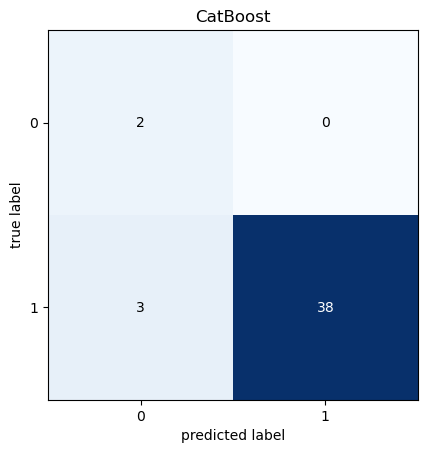

In [16]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(iterations=20, learning_rate=0.44, max_depth=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# plot_confusion_matrix(classifier, X_test, y_test)

fig, ax = plot_confusion_matrix(cm)
ax.set_title('CatBoost')
plt.savefig('CatBoost_cm.svg', bbox_inches='tight')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')

## LightGBM

C:\Users\karta\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\karta\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Number of positive: 145, number of negative: 23
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6
[LightGBM] [Info] Number of data points in the train set: 168, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.863095 -> initscore=1.841240
[LightGBM] [Info] Start training from score 1.841240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

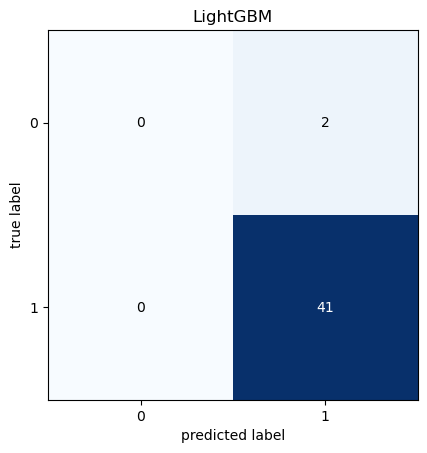

In [17]:
from lightgbm import LGBMClassifier
classifier = LGBMClassifier(n_estimators = 20, num_threads = 8, bagging_fraction = 1, max_depth = 6)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# plot_confusion_matrix(classifier, X_test, y_test)

fig, ax = plot_confusion_matrix(cm)
ax.set_title('LightGBM')
plt.savefig('LightGBM_cm.svg', bbox_inches='tight')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')

## AdaBoost


accuracy:    0.9767441860465116 
f1-score:    0.9730083123190436 
precision:   0.9772978959025471 
recall:      0.9767441860465116 
sensitivity: 0.5 
specificity: 1.0 




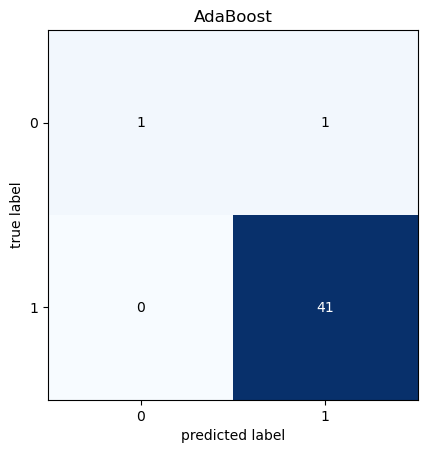

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from mlxtend.plotting import plot_confusion_matrix

# Initialize and fit the AdaBoost classifier
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plot_confusion_matrix(cm)
ax.set_title('AdaBoost')
plt.savefig('AdaBoost_cm.svg', bbox_inches='tight')

# Calculate sensitivity and specificity
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Print metrics
print('\naccuracy:   ', accuracy_score(y_test, y_pred),
      '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted'),
      '\nprecision:  ', precision_score(y_test, y_pred, average='weighted', zero_division=0),
      '\nrecall:     ', recall_score(y_test, y_pred, average='weighted'),
      '\nsensitivity:', sensitivity,
      '\nspecificity:', specificity, '\n\n')


## Decision Tree


accuracy:    0.9534883720930233 
f1-score:    0.9534883720930233 
precision:   0.9534883720930233 
recall:      0.9534883720930233 
sensitivity: 0.5 
specificity: 0.975609756097561 




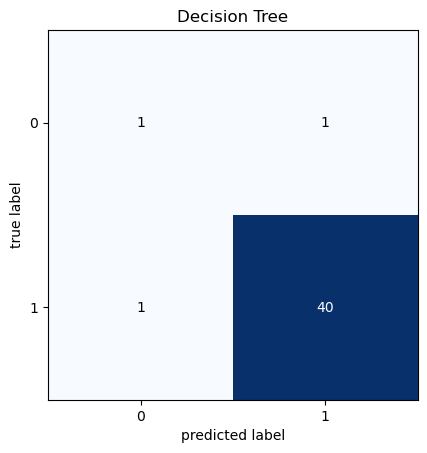

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Initialize Decision Tree classifier
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train, y_train)

# Predict on test data
y_pred = classifier.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plot_confusion_matrix(cm)
ax.set_title('Decision Tree')
plt.savefig('DecisionTree_cm.svg', bbox_inches='tight')

# Calculate sensitivity and specificity
sensitivity = cm[0,0] / (cm[0,0] + cm[0,1])
specificity = cm[1,1] / (cm[1,0] + cm[1,1])

# Print metrics
print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted', zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')


## KNN


accuracy:    0.9302325581395349 
f1-score:    0.9367786391042204 
precision:   0.9451550387596899 
recall:      0.9302325581395349 
sensitivity: 0.5 
specificity: 0.9512195121951219 




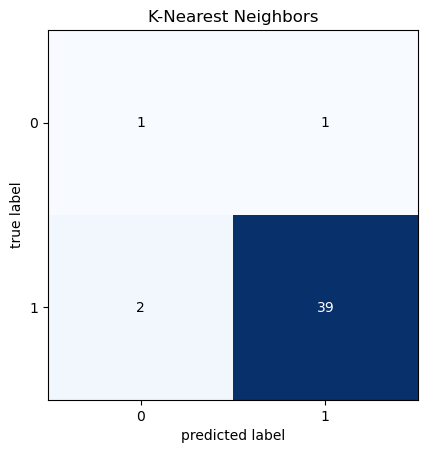

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Initialize KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predict on test data
y_pred = classifier.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plot_confusion_matrix(cm)
ax.set_title('K-Nearest Neighbors')
plt.savefig('KNN_cm.svg', bbox_inches='tight')

# Calculate sensitivity and specificity
sensitivity = cm[0,0] / (cm[0,0] + cm[0,1])
specificity = cm[1,1] / (cm[1,0] + cm[1,1])

# Print metrics
print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted', zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')


## Logistic Regression


accuracy:    0.9534883720930233 
f1-score:    0.9534883720930233 
precision:   0.9534883720930233 
recall:      0.9534883720930233 
sensitivity: 0.5 
specificity: 0.975609756097561 




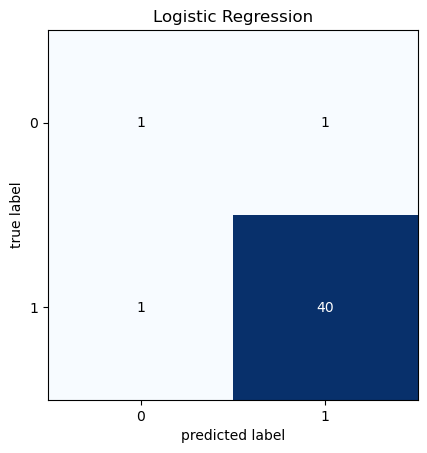

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Initialize Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Predict on test data
y_pred = classifier.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plot_confusion_matrix(cm)
ax.set_title('Logistic Regression')
plt.savefig('LogisticRegression_cm.svg', bbox_inches='tight')

# Calculate sensitivity and specificity
sensitivity = cm[0,0] / (cm[0,0] + cm[0,1])
specificity = cm[1,1] / (cm[1,0] + cm[1,1])

# Print metrics
print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted', zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')


## GaussianNB


accuracy:    0.6976744186046512 
f1-score:    0.7847895477705743 
precision:   0.9596899224806201 
recall:      0.6976744186046513 
sensitivity: 1.0 
specificity: 0.6829268292682927 




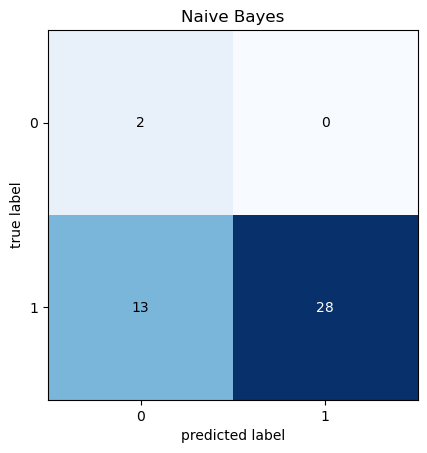

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Initialize Naive Bayes classifier (GaussianNB)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict on test data
y_pred = classifier.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plot_confusion_matrix(cm)
ax.set_title('Naive Bayes')
plt.savefig('NaiveBayes_cm.svg', bbox_inches='tight')

# Calculate sensitivity and specificity
sensitivity = cm[0,0] / (cm[0,0] + cm[0,1])
specificity = cm[1,1] / (cm[1,0] + cm[1,1])

# Print metrics
print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted', zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')


## SHAP

                                 Feature  Mean Absolute SHAP Value
5                                  fever                  0.636926
1                           skin lesions                  0.539143
0                                   rash                  0.177392
2                               headache                  0.164971
4                oral and genital ulcers                  0.163962
16                           muscle pain                  0.161989
15                               fatigue                  0.152533
3                     ulcerative lesions                  0.068848
8                  genital ulcer lesions                  0.021271
29                   swollen lymph nodes                  0.002059
30                         mild symptoms                  0.000000
36                        Pain urinating                  0.000000
31                           sore throat                  0.000000
32                               malaise                  0.00

<Axes: xlabel='Feature'>

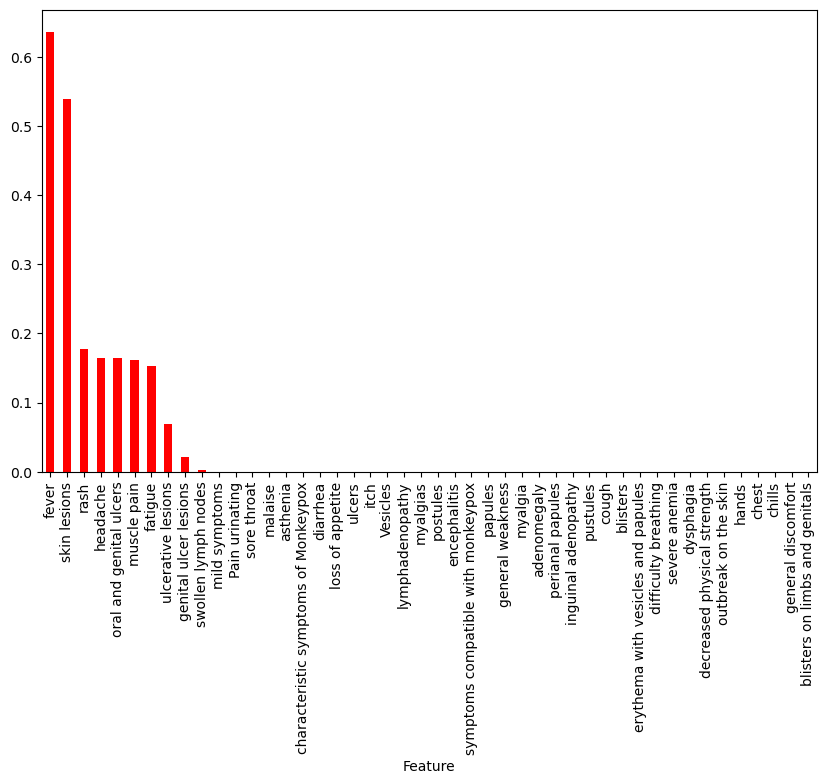

In [13]:
### import numpy as np
import pandas as pd
import shap
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = pd.DataFrame(X, columns=['rash', 'skin lesions', 'headache', 'ulcerative lesions',
       'oral and genital ulcers', 'fever', 'perianal papules',
       'inguinal adenopathy', 'genital ulcer lesions', 'pustules', 'cough',
       'blisters', 'erythema with vesicles and papules',
       'difficulty breathing', 'severe anemia', 'fatigue', 'muscle pain',
       'dysphagia', 'decreased physical strength', 'outbreak on the skin',
       'hands', 'chest', 'chills', 'general weakness', 'general discomfort',
       'adenomegaly', 'myalgia', 'itch', 'papules', 'swollen lymph nodes',
       'mild symptoms', 'sore throat', 'malaise', 'asthenia',
       'characteristic symptoms of Monkeypox', 'diarrhea', 'Pain urinating',
       'ulcers', 'loss of appetite', 'Vesicles', 'lymphadenopathy', 'myalgias',
       'postules', 'encephalitis', 'symptoms compatible with monkeypox',
       'blisters on limbs and genitals'])
      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=935)

# Train model
model = XGBClassifier(learning_rate=0.0991, gamma=0, n_estimators=80)
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Compute mean absolute SHAP values
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Mean Absolute SHAP Value': mean_abs_shap_values
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Display the DataFrame
print(shap_importance)

# Plot the results
shap_importance.plot.bar(x='Feature', y='Mean Absolute SHAP Value', legend=False, color='red', figsize=(10, 6))


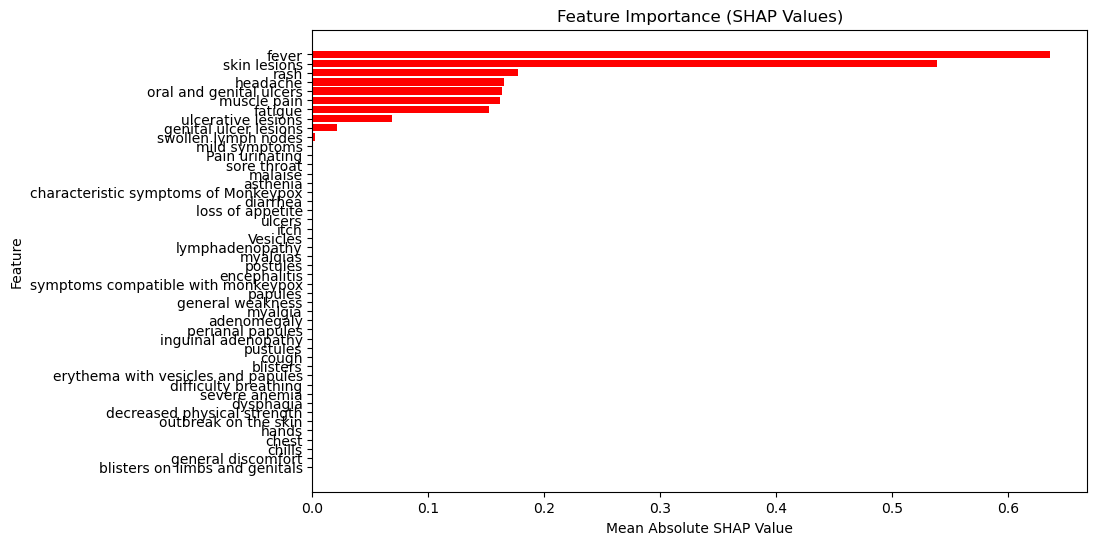

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(shap_importance['Feature'], shap_importance['Mean Absolute SHAP Value'], color='red')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Feature Importance (SHAP Values)')
plt.gca().invert_yaxis() 
plt.show()

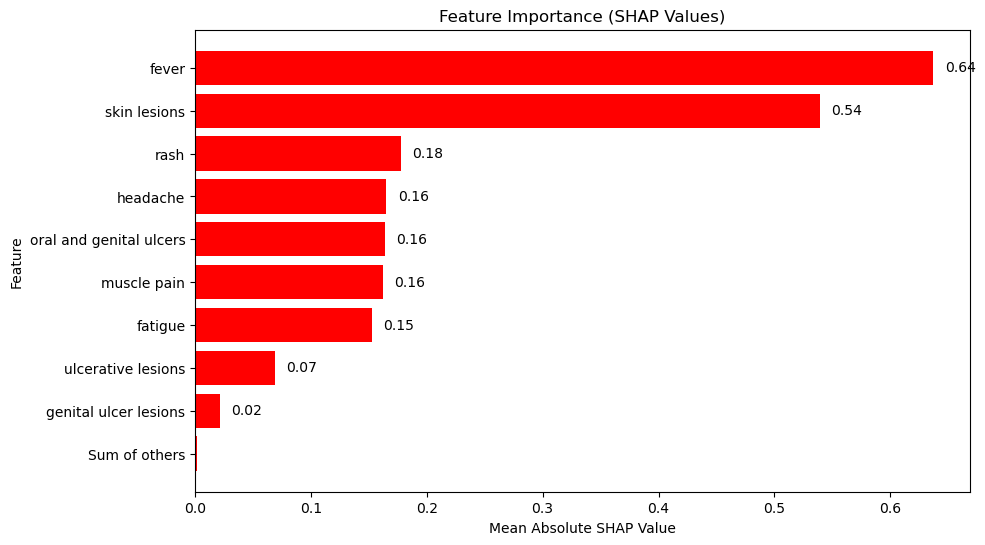

In [15]:
top_features = shap_importance[:9]
others = pd.DataFrame({'Feature': ['Sum of others'], 'Mean Absolute SHAP Value': [shap_importance['Mean Absolute SHAP Value'][9:].sum()]})
final_df = pd.concat([top_features, others], ignore_index=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(final_df['Feature'], final_df['Mean Absolute SHAP Value'], color='red')

for i, bar in enumerate(bars):
    if i < 9:  # İlk 9 bar
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                 f"{final_df['Mean Absolute SHAP Value'][i]:.2f}", va='center')

plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Feature Importance (SHAP Values)')
plt.gca().invert_yaxis()  # En önemli özelliği en üstte göstermek için
plt.show()


Accuracy: 1.0


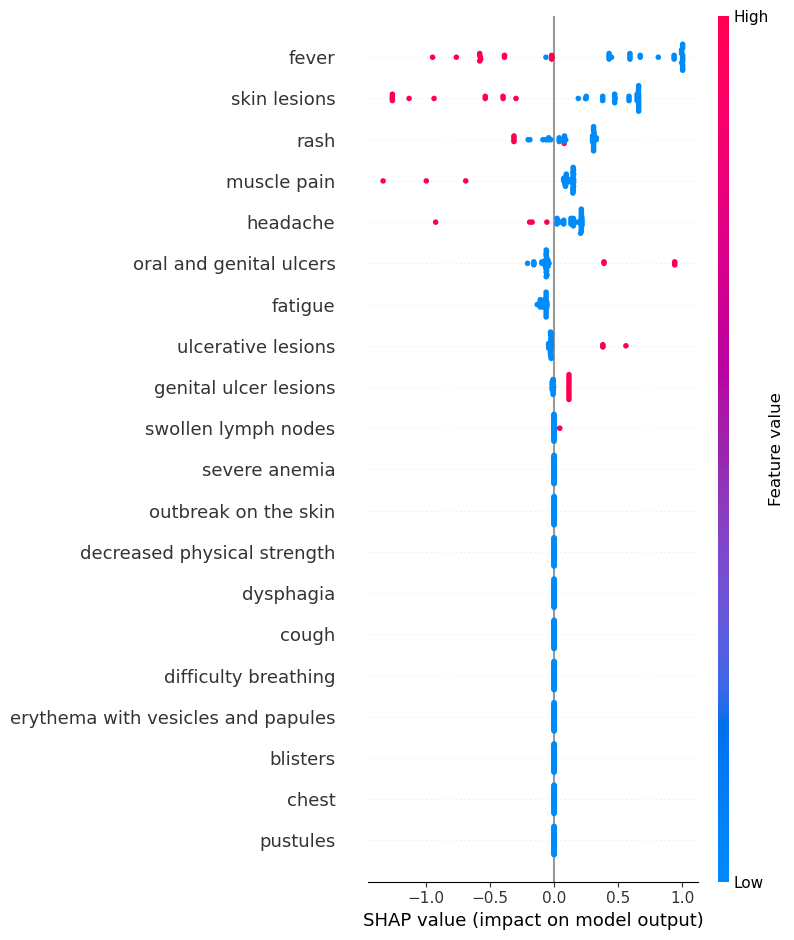

In [16]:
import shap
import xgboost as xgb
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# SHAP
explainer = shap.TreeExplainer(model) 
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)